### Libraries

In [2]:
import pandas as pd
import plotly.express as px
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

### Import Data

In [3]:
file_name = "Brand Performance Raw Data.xlsx"
sheets_dict = pd.read_excel(file_name, engine="openpyxl", sheet_name=None)

raw_data = sheets_dict['Raw data']
market_data = sheets_dict['Market data']
market_share_data = sheets_dict['Market share calculations']

### Exploratory Data Analysis

In [5]:
raw_data.describe()

,Media Budget,Revenue,monthly contribution to Market Share,Media Budget to Revenue Ratio,Sales Growth,ROI,Return on ad Spend
count,180.000000,1.800000e+02,180.000000,180.000000,1.800000e+02,180.000000,180.000000
mean,357911.111111,1.230971e+07,0.200000,0.029252,1.271281e+05,-1.507517,35.735638
std,87327.118206,2.220322e+06,0.169906,0.006136,2.748646e+06,8.194018,7.710991
min,203000.000000,8.091780e+06,0.050000,0.016722,-8.139718e+06,-34.845416,20.816347
25%,288750.000000,1.045336e+07,0.070000,0.025152,-1.402351e+06,-5.345644,29.783904
50%,364000.000000,1.189757e+07,0.140000,0.028206,1.007335e+05,-0.699493,35.453004
75%,428250.000000,1.379179e+07,0.310000,0.033575,1.987379e+06,3.899524,39.758947
max,500000.000000,1.886670e+07,0.790000,0.048039,6.661573e+06,14.854671,59.802000


In [6]:
market_data.describe()

,Competitor A,% Market Share Competitor A,Competitor B,% Market Share Competitor B,Competitor C,% Market Share Competitor C,Client Market Size,% Market Share Competitor Client,Total Market Size
count,3.600000e+01,36.000000,3.600000e+01,36.000000,3.600000e+01,36.000000,3.900000e+01,36.000000,3.700000e+01
mean,6.025514e+07,0.264990,5.428514e+07,0.238727,5.125223e+07,0.225470,1.136281e+08,0.270812,2.937005e+08
std,8.208418e+06,0.032087,6.648669e+06,0.024557,5.975083e+06,0.022894,1.829710e+08,0.035155,4.038854e+08
min,4.843267e+07,0.211240,4.430472e+07,0.194857,4.070722e+07,0.186994,4.767590e+07,0.219565,1.942764e+08
25%,5.204197e+07,0.232633,4.786487e+07,0.221394,4.637203e+07,0.205681,5.603467e+07,0.246934,2.206751e+08
50%,6.175876e+07,0.267227,5.469190e+07,0.239158,5.224916e+07,0.222021,6.148679e+07,0.265149,2.298452e+08
75%,6.754908e+07,0.288840,5.838035e+07,0.257631,5.663010e+07,0.244902,6.990321e+07,0.287829,2.374237e+08
max,7.175352e+07,0.334919,6.595013e+07,0.283160,5.973402e+07,0.270951,7.491799e+08,0.360082,2.682641e+09


In [11]:
market_share_data.describe()

,Market Share per Month from revenue,Total ad-spend per month,Market Share per ad-spend
count,3.600000e+01,3.600000e+01,36.000000
mean,6.154856e+07,1.789556e+06,34.678684
std,8.678260e+06,1.926868e+05,5.443559
min,4.767590e+07,1.321000e+06,24.895659
25%,5.562521e+07,1.664250e+06,30.399947
50%,6.097442e+07,1.812000e+06,33.858448
75%,6.775446e+07,1.951500e+06,38.303292
max,7.960936e+07,2.073000e+06,45.707626


#### Histograms

In [7]:
fig_brands_rev = px.bar(raw_data, x='Date', y='Revenue', color='Brand')
fig_brands_rev.show()

In [8]:
fig_brands_ctb = px.bar(raw_data, x='Date', y='monthly contribution to Market Share', color='Brand')
fig_brands_ctb.show()

The variable 'monthly contribution to Market Share' does not seem to follow any consistent or expected pattern.

In [9]:
fig_brands_rev = px.bar(raw_data, x='Date', y='Media Budget', color='Brand')
fig_brands_rev.show()

#### Box Plots

In [16]:
fig = px.box(raw_data, y="Media Budget")
fig.show()

In [17]:
fig = px.box(raw_data, y="Revenue")
fig.show()

#### Line and Scatter Plots

In [13]:
fig_ms_1 = px.scatter(market_share_data, x='Total ad-spend per month', y='Market Share per Month from revenue', trendline="ols")
fig_ms_1.show()

In [18]:
fig_ms_2 = px.line(market_share_data, x='Month', y='Market Share per ad-spend')
fig_ms_2.show()

In [20]:
fig_3 = px.scatter(raw_data, x='Revenue', y='Media Budget', trendline="ols")
fig_3.show()

#graph indicates a positive relationship between media budget and revenue

#### Time Series Analysis

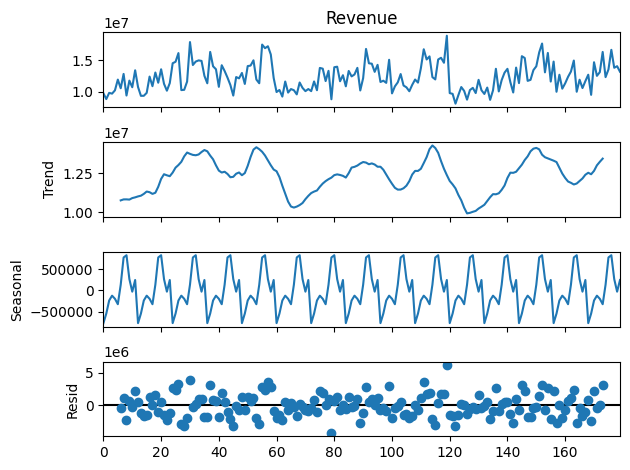

In [4]:
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(raw_data['Revenue'], model='additive', period=12)
result.plot()
pyplot.show()

Conclusion: There seems to be an additive(maginitude does not go up as data value increases) seasonal component to the revenue variable. Residuals are also scattered randomly around 0, we can conclude that a linear model would be appropriate. 

### Feature Engineering

Part of feature engineering was done in excel to expedite the data analysis. 

### Investigating Distribution patterns: testing for normality

In order to perform parametric or non-parametric testing we must determine the distribution of the data

In [5]:
budget_array = raw_data['Media Budget'].to_numpy()
revenue_array = raw_data['Revenue'].to_numpy()

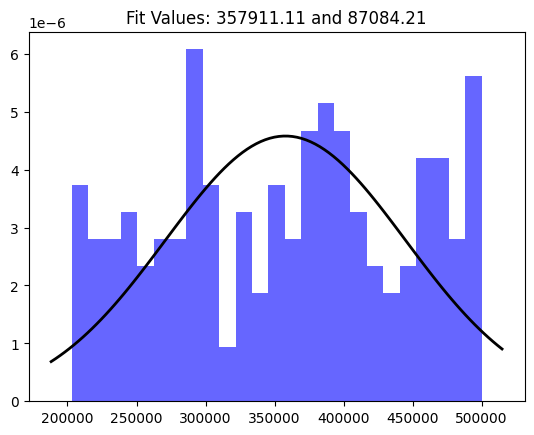

In [6]:
# mean and standard deviation
mu_b, std_b = norm.fit(budget_array) 

# Plot the histogram.
plt.hist(budget_array, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu_b, std_b)

plt.plot(x, p, 'k', linewidth=2)
title = "Fit Values: {:.2f} and {:.2f}".format(mu_b, std_b)
plt.title(title)

plt.show()

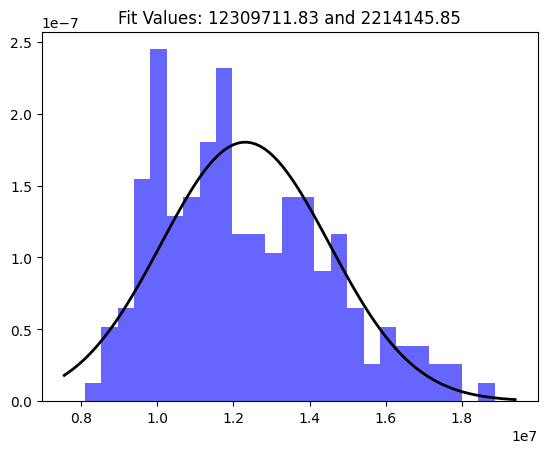

In [7]:
# mean and standard deviation
mu_r, std_r = norm.fit(revenue_array) 

# Plot the histogram.
plt.hist(revenue_array, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu_r, std_r)

plt.plot(x, p, 'k', linewidth=2)
title = "Fit Values: {:.2f} and {:.2f}".format(mu_r, std_r)
plt.title(title)

plt.show()

Conclusion: Difficult to be sure if data is actually normally distributed or a trick of the eye.

#### Shapiro–Wilk test

In [8]:
from scipy.stats import shapiro

print(shapiro(budget_array))
print(shapiro(revenue_array))

ShapiroResult(statistic=np.float64(0.9527348484657445), pvalue=np.float64(1.0190782364047984e-05))
ShapiroResult(statistic=np.float64(0.9655545296851628), pvalue=np.float64(0.00020267033967761173))


The p-value is 0.00001 and 0.0002 respectively which is less than the alpha(0.05) then we reject the null hypothesis i.e. we have sufficient evidence to say that sample does not come from a normal distribution.

In [9]:
import statsmodels.api as sm 
import pylab as py 

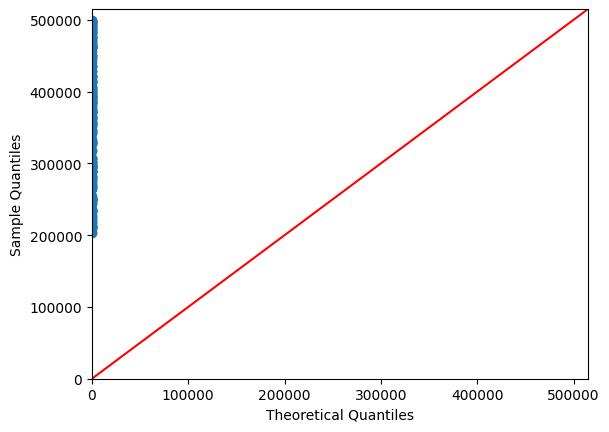

In [10]:
sm.qqplot(budget_array, line ='45') 
py.show()

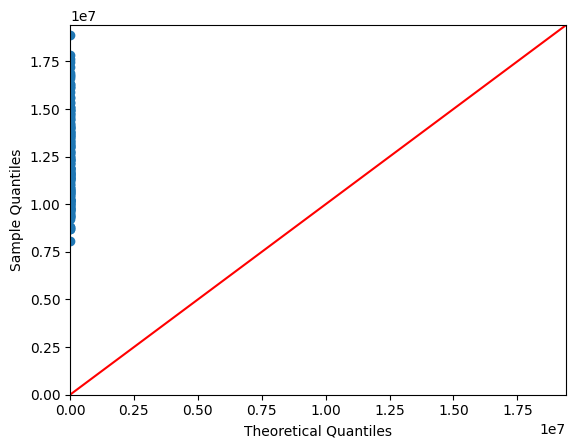

In [11]:
sm.qqplot(revenue_array, line ='45') 
py.show()

#### Investigating Time effect in time series

Kendall-Tau rank correlation was chosen to test correlation for several reasons:

1) It is a non-parametric test, therefore, it does not make assumptions about the data.
2) It can also be used to calculate the trend in the data by setting the other as an ordinal representation of time Kendall's Tau would represent the trend in the time series.

Assumptions:

* Variables tested are continuous
* Variables tested are monotonic (one consistent direction in relationship)

Note: 

Tau correlation coefficient is often compared to Pearson correlation coefficient, however, its advantage in this context is that is also works when we are not sure if the relationship is ordinal or not.

In [14]:
import scipy.stats as stats

x1 = market_share_data['Market Share per Month from revenue']
x2 = np.arange(len(x1))
tau, p_value = stats.kendalltau(x1, x2)

print("Tau is calculated as", tau)
print("P-value is calculated as", p_value)

#Trend is not significant therefore, we can conclude that market share per month is not changing in relation to time.

Tau is calculated as 0.13968253968253969
P-value is calculated as 0.23066846966340493


In [15]:
x1 = market_share_data['Total ad-spend per month']
x2 = np.arange(len(x1))
tau, p_value = stats.kendalltau(x1, x2)

print("Tau is calculated as", tau)
print("P-value is calculated as", p_value)

#Trend is not significant therefore, we can conclude that total ad-spend per month is not changing in relation to time.

Tau is calculated as -0.20952380952380956
P-value is calculated as 0.07218365970978308


In [16]:
x1 = raw_data['Media Budget']
x2 = np.arange(len(x1))
tau, p_value = stats.kendalltau(x1, x2)

print("Tau is calculated as", tau)
print("P-value is calculated as", p_value)

Tau is calculated as -0.08868174637857276
P-value is calculated as 0.07768386038789547


In [17]:
x1 = raw_data['Revenue']
x2 = np.arange(len(x1))
tau, p_value = stats.kendalltau(x1, x2)

print("Tau is calculated as", tau)
print("P-value is calculated as", p_value) 

Tau is calculated as 0.091495965238982
P-value is calculated as 0.06821577330289057


Trend is significant at the 7% level. In combination with visual decomposition of revenue series, we can conclude that there is some effect of time on the data, however, given the size of the Tau coefficient it is expected to be quite small. 

### Correlation Analsis

In [19]:
x1 = raw_data['Media Budget']
x2 = raw_data['Revenue']
tau, p_value = stats.kendalltau(x1, x2)
#check_trend(y, confidence=0.05)

print("Tau is calculated as", tau)
print("P-value is calculated as", p_value)
#A small but statistically significant relationship between revenue and advertising budget, this will be the basis for our model selection.
# We reject the null hypothesis that the variables are statistically independent.

Tau is calculated as 0.39962756117020237
P-value is calculated as 1.858780018998083e-15


From this section we can conclude that a time series specific model is not necessary as there does not seem to be a strong correlation between the variables and their time component. We have also decided that given the size of the dataset and the normality tests, we should not choose a model that is strictly dependent on a normal distribution.